In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path

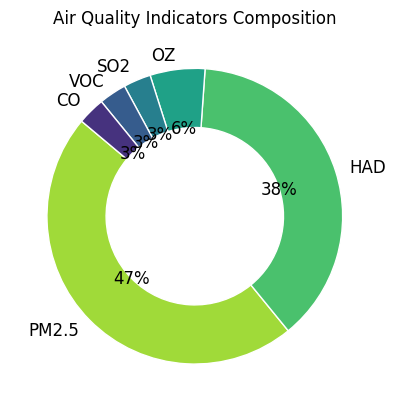

In [15]:
# Indicator weights
weights = {
    'PM2.5': 47,
    'HAD': 38,
    'OZ': 6,
    'SO2': 3,
    'VOC': 3,
    'CO': 3}

# Labels and values for the pie chart
labels = list(weights.keys())
values = list(weights.values())

# Custom color palette for more distinct colors
custom_palette = sns.color_palette("viridis", n_colors=len(values))[::-1]

# Plotting the pie chart with custom colors
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.0f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1),
    colors=custom_palette
)

# Adjusting text properties for better readability
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')


# Adding a title
ax.set_title('Air Quality Indicators Composition')
plt.savefig("air_indicators_composition.png", facecolor='#F9F9F9', bbox_inches='tight')

# Display the pie chart
plt.show()


**Air Pollution Sources**

In [31]:
def process_excel_file(file_path, sheet_names, new_row_names):
    # Load the Excel file with only the first row for each sheet
    dataframes = [pd.read_excel(file_path, sheet_name=sheet, nrows=1) for sheet in sheet_names]

    # Combine the dataframes vertically
    combined_data = pd.concat(dataframes, ignore_index=True)

    # Set the new row names as the index
    combined_data.index = new_row_names

    # Delete the first column
    combined_data = combined_data.drop(combined_data.columns[0], axis=1)

    return combined_data

In [32]:
file_path="/content/air_pollution_sources.xlsx"
sheet_names_COE=["Sheet 1","Sheet 2","Sheet 3","Sheet 4","Sheet 5","Sheet 6"]
sheet_names_SOE=["Sheet 7","Sheet 8","Sheet 9","Sheet 10","Sheet 11","Sheet 12"]
sheet_names_PMD=["Sheet 13","Sheet 14","Sheet 15","Sheet 16","Sheet 17","Sheet 18"]
sheet_names_VOC=["Sheet 19","Sheet 20","Sheet 21","Sheet 22","Sheet 23","Sheet 24"]
new_row_names = ['Combustion in \nmetal\nmanufacturing', 'Combustion in\nchemical\nmanufacturing', 'Road transport:\npassenger cars', 'Road transport: \nheavy vehicles and\nbuses', 'Commercial/\nInstitutional', 'Agriculture/Forestry\n/Fishing']

In [34]:
COE_sources = process_excel_file(file_path , sheet_names_COE , new_row_names)
SOE_sources = process_excel_file(file_path , sheet_names_SOE , new_row_names)
PMD_sources = process_excel_file(file_path , sheet_names_PMD , new_row_names)
VOC_sources = process_excel_file(file_path , sheet_names_VOC , new_row_names)

In [35]:
COE_sources

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Combustion in \nmetal\nmanufacturing,911918,855435,884245,856010,884871,864704,811476,820019,683069,774468
Combustion in\nchemical\nmanufacturing,91012,86943,82976,80336,80606,84907,82480,85294,77311,81132
Road transport:\npassenger cars,3396214,3145673,3037322,2907325,2827024,2786017,2522170,2475335,1999481,2106601
Road transport: \nheavy vehicles and\nbuses,452393,439740,414270,386917,352911,323672,285585,255818,215138,202644
Commercial/\nInstitutional,324936,317818,279897,279562,287639,283069,262629,237579,228899,261244
Agriculture/Forestry\n/Fishing,491137,345073,327958,315846,327834,319298,297135,257798,251246,239074


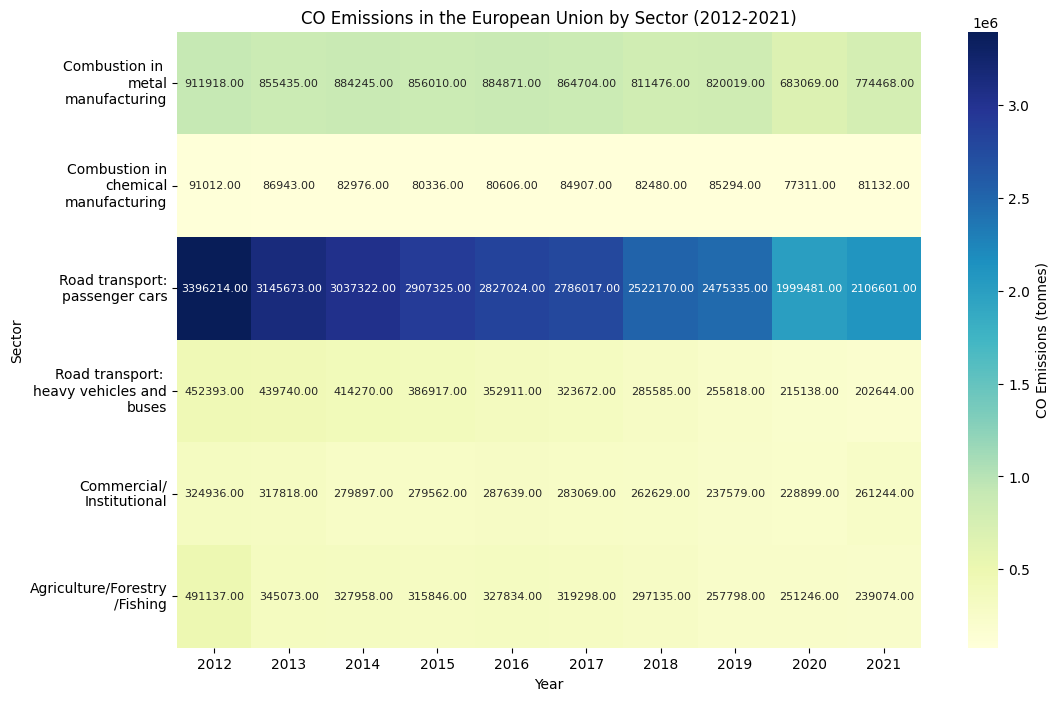

In [36]:
# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(COE_sources, cmap='YlGnBu', annot=True, fmt=".2f",cbar_kws={'label': 'CO Emissions (tonnes)'},annot_kws={'size': 8})

# Modify y-axis labels to display vertically
heatmap.set_yticklabels(new_row_names)  # You can adjust rotation for your preference

plt.title('CO Emissions in the European Union by Sector (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Sector')

# Save the plot to a file
plt.savefig("CO Emissions heatmap.png", facecolor='#F9F9F9', bbox_inches='tight')

# Show the plot
plt.show()

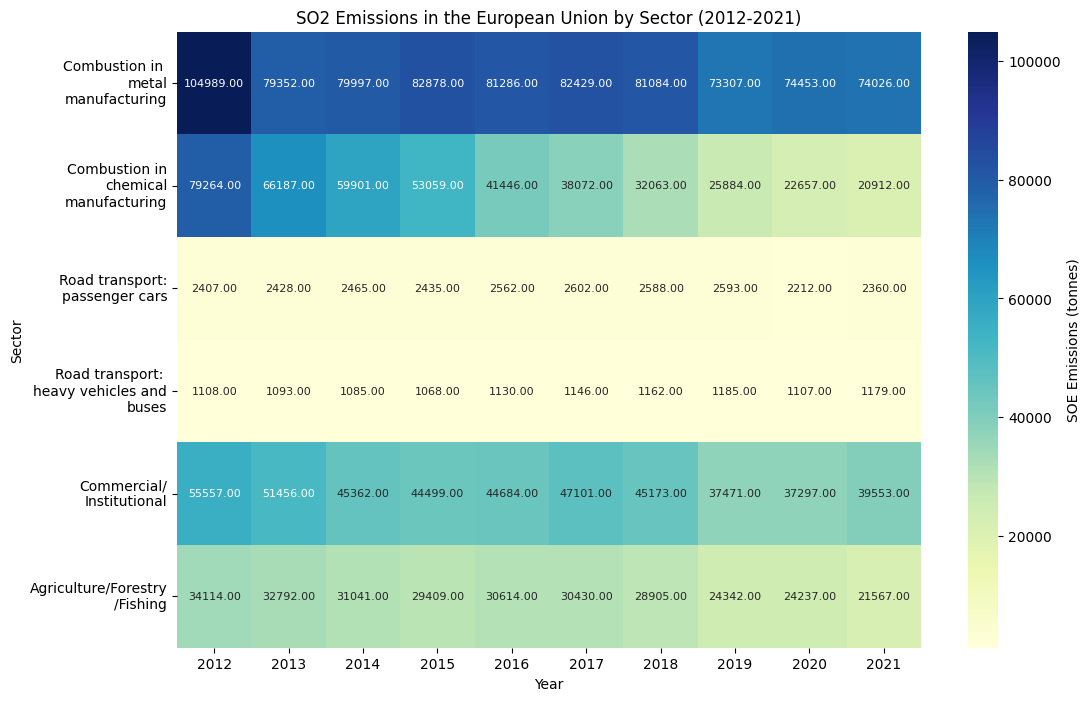

In [37]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(SOE_sources, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'SOE Emissions (tonnes)'},annot_kws={'size': 8})
plt.title('SO2 Emissions in the European Union by Sector (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Sector')
# Save the plot to a file (e.g., in PNG format)
plt.savefig("SO2 Emissions heatmap.png", facecolor='#F9F9F9', bbox_inches='tight')
# Show the plot
plt.show()

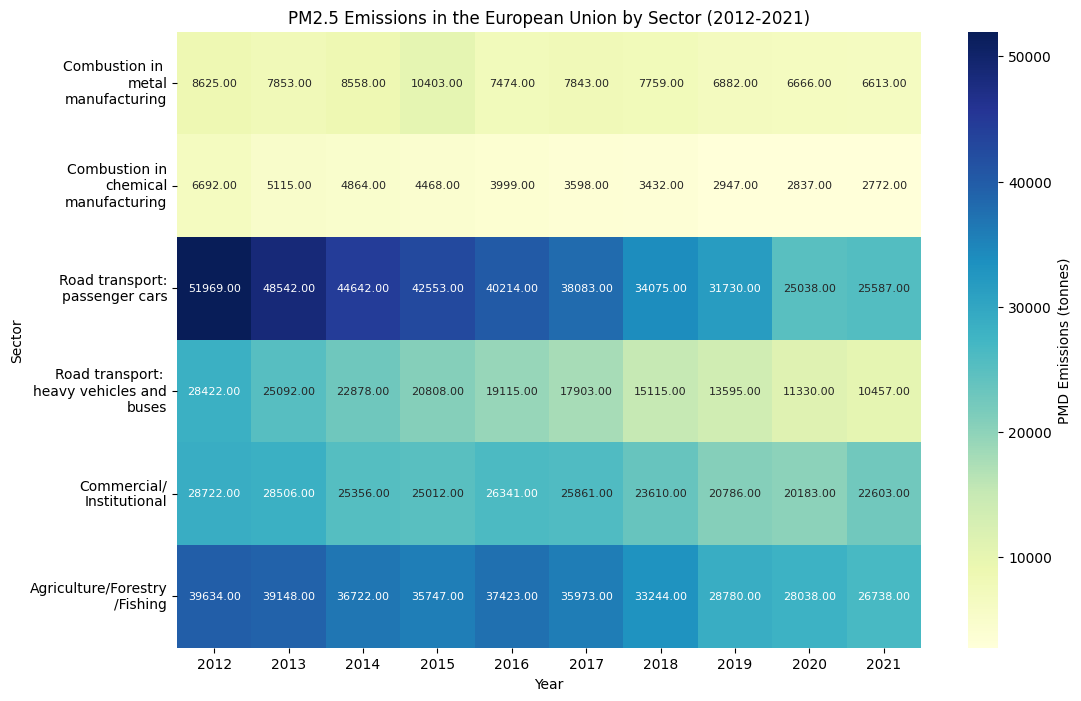

In [38]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(PMD_sources, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'PMD Emissions (tonnes)'},annot_kws={'size': 8})
plt.title('PM2.5 Emissions in the European Union by Sector (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Sector')
# Save the plot to a file (e.g., in PNG format)
plt.savefig("PM Emissions heatmap.png", facecolor='#F9F9F9', bbox_inches='tight')
# Show the plot
plt.show()


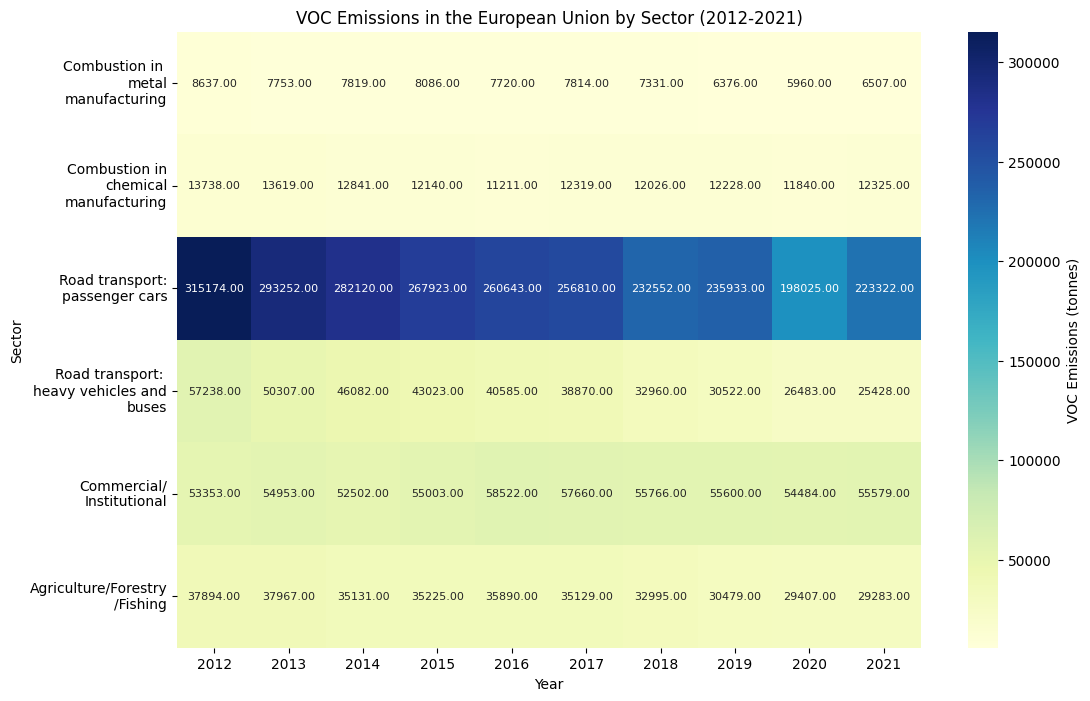

In [39]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(VOC_sources, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'VOC Emissions (tonnes)'},annot_kws={'size': 8})
plt.title('VOC Emissions in the European Union by Sector (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Sector')
# Save the plot to a file (e.g., in PNG format)
plt.savefig("VOC Emissions heatmap.png", facecolor='#F9F9F9', bbox_inches='tight')
# Show the plot
plt.show()

**Air Pollution Levels Analysis**

In [16]:
indicator_paths = ['/content/COE_transformed.csv', '/content/HAD_transformed.csv', '/content/OZD_transformed.csv', '/content/PMD_transformed.csv', '/content/SOE_transformed.csv', '/content/VOE_transformed.csv']


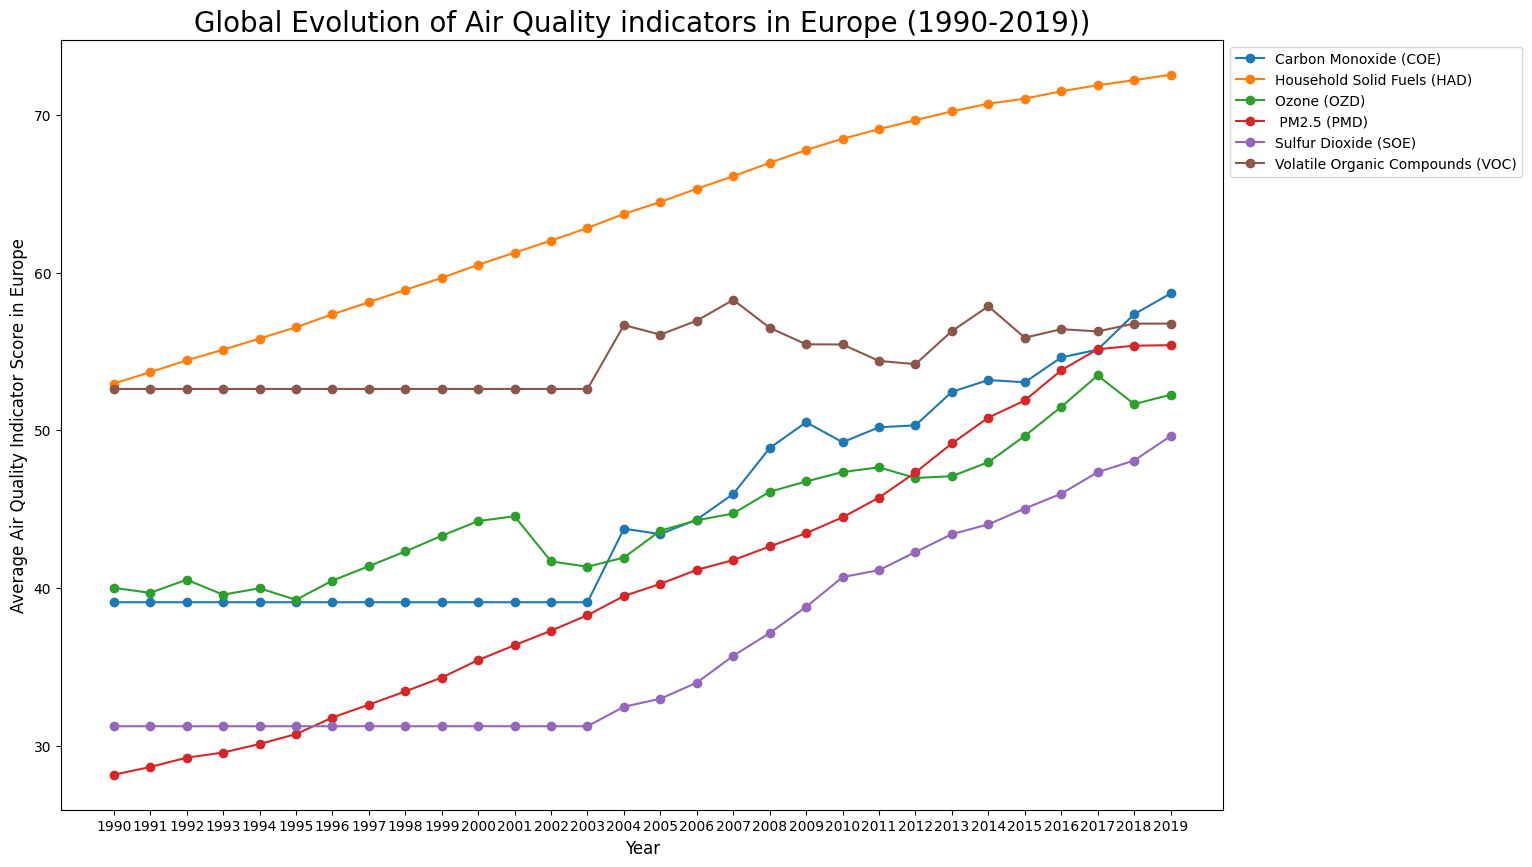

In [17]:

# Create an empty DataFrame to store mean values for each indicator
mean_by_indicator = pd.DataFrame()

# Read each indicator dataset and calculate the mean for each year
for file_path in indicator_paths:
    indicator_df = pd.read_csv(file_path, index_col=0)
    indicator_df.replace(-8888, 0, inplace=True)
    mean_by_indicator[file_path] = indicator_df.mean()

# Plot a separate line plot for each indicator
plt.figure(figsize=(15, 10))

for column in mean_by_indicator.columns:
    plt.plot(mean_by_indicator.index, mean_by_indicator[column], label=column, marker='o')

plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Air Quality Indicator Score in Europe' , fontsize=12)
plt.title('Global Evolution of Air Quality indicators in Europe (1990-2019))' , fontsize=20)
legend_labels = ['Carbon Monoxide (COE)', 'Household Solid Fuels (HAD)', 'Ozone (OZD)', ' PM2.5 (PMD)', 'Sulfur Dioxide (SOE)', 'Volatile Organic Compounds (VOC)']
plt.legend(legend_labels,loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.grid(False)
plt.savefig("Air Quality indicators evolution.png", facecolor='#F9F9F9', bbox_inches='tight')
plt.show()


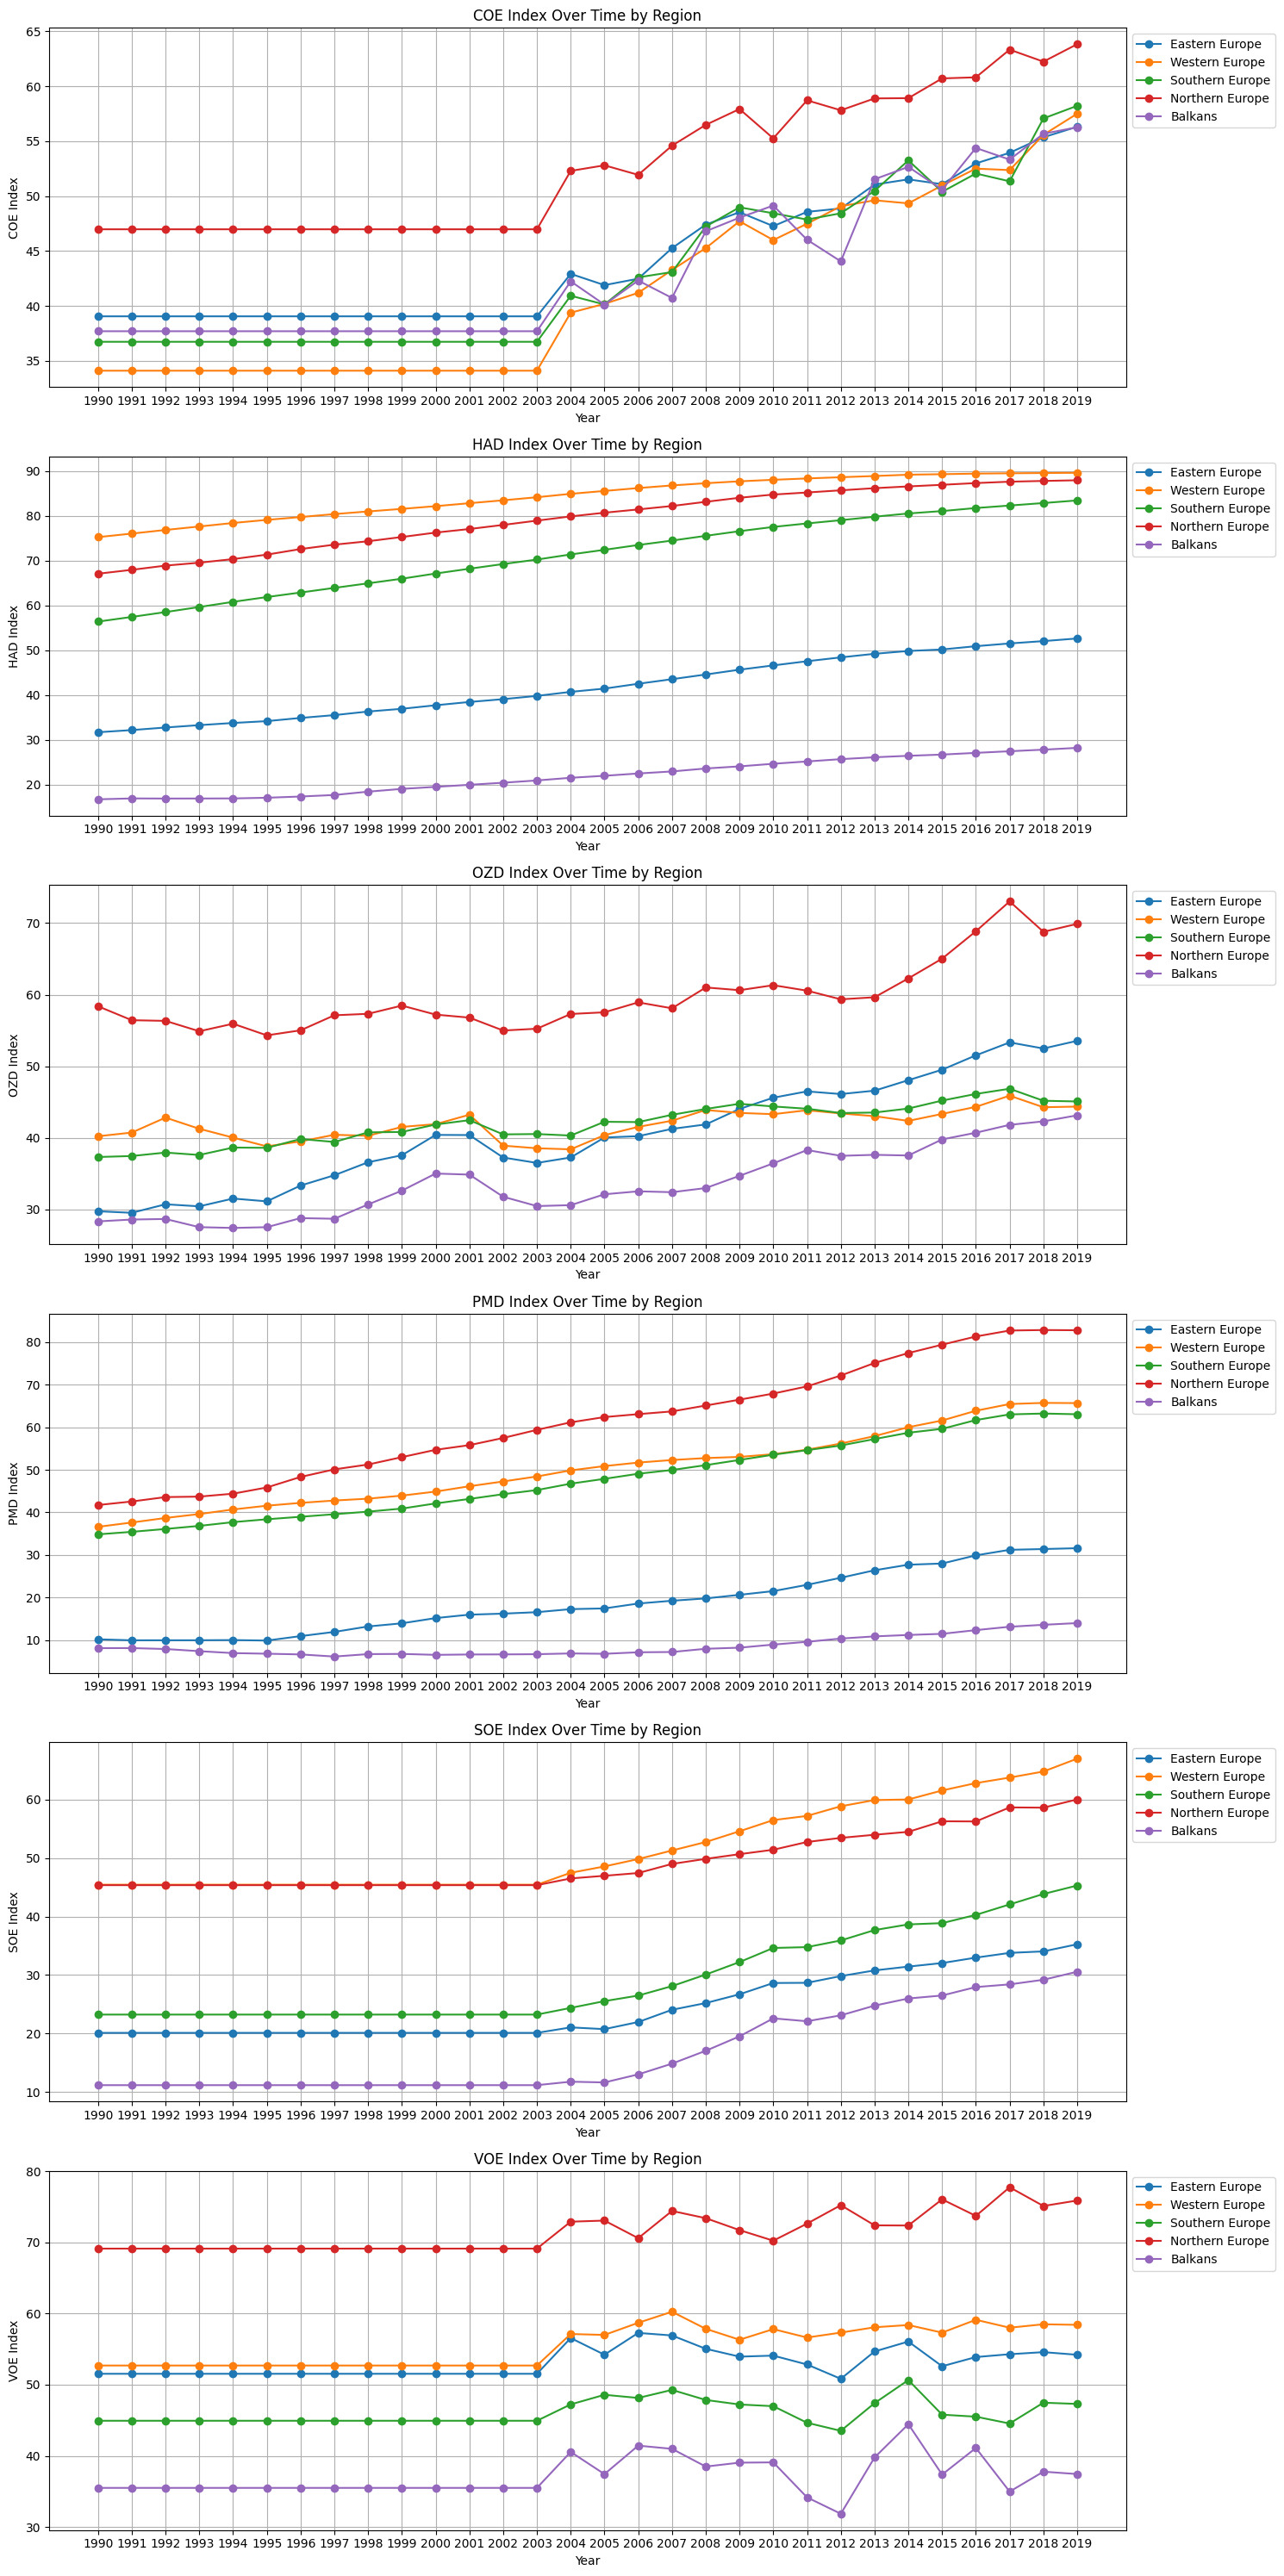

In [18]:
def plot_indicators_by_region(indicator_path, regions, ax):
    # Read the indicator data
    df = pd.read_csv(indicator_path, index_col=0)
    df.replace(-8888, 0, inplace=True)  # Replace missing values if needed

    # Plot indicator for each region
    for region, iso_codes in regions.items():
        region_data = df.loc[iso_codes]
        ax.plot(region_data.columns, region_data.mean(), marker='o', label=region)

    # Customize the legend to order labels based on the plotted lines
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    indicator_name = Path(indicator_path).stem.replace("_transformed", "")  # Remove "_transformed"
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{indicator_name} Index')  # Use modified indicator name
    ax.set_title(f'{indicator_name} Index Over Time by Region' )
    ax.grid(True)

# Define regions for grouping countries
regions = {
    'Eastern Europe': ['ALB','BLR', 'BGR', 'CZE', 'HUN', 'MDA', 'POL', 'ROU', 'SVK', 'UKR'],
    'Western Europe': ['AND', 'AUT', 'BEL', 'FRA', 'DEU', 'LIE', 'LUX', 'MCO', 'NLD', 'CHE'],
    'Southern Europe': ['HRV', 'CYP', 'GRC', 'ITA', 'MLT', 'PRT', 'SMR', 'SVN', 'ESP'],
    'Northern Europe': ['DNK', 'EST', 'FIN', 'ISL', 'IRL', 'LVA', 'LTU', 'NOR', 'SWE', 'GBR'],
    'Balkans': ['BIH', 'XKX', 'MNE', 'MKD', 'SRB'],
}


# Create subplots
num_indicators = len(indicator_paths)
fig, axs = plt.subplots(nrows=num_indicators, ncols=1, figsize=(15, 5 * num_indicators))

# Plot each indicator
for i, indicator_path in enumerate(indicator_paths):
    plot_indicators_by_region(indicator_path, regions, axs[i])

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("Air Quality indicators regional evolution.png", facecolor='#F9F9F9', bbox_inches='tight')

# Show the plots
plt.show()

In [20]:
#CLACULATING tHE AIR QUALITY SCORE (AQS) for each european country over the years:
COE = pd.read_csv('/content/COE_transformed.csv', index_col=0)
HAD = pd.read_csv('/content/HAD_transformed.csv',index_col=0)
OZD = pd.read_csv('/content/OZD_transformed.csv',index_col=0)
PMD = pd.read_csv('/content/PMD_transformed.csv',index_col=0)
SOE = pd.read_csv('/content/SOE_transformed.csv',index_col=0)
VOE = pd.read_csv('/content/VOE_transformed.csv',index_col=0)

COE.replace(-8888, 0, inplace=True)
HAD.replace(-8888, 0, inplace=True)
OZD.replace(-8888, 0, inplace=True)
PMD.replace(-8888, 0, inplace=True)
SOE.replace(-8888, 0, inplace=True)
VOE.replace(-8888, 0, inplace=True)

# Creating a new DataFrame with the same dimensions as rec, ocp and msw
result = pd.DataFrame(index=COE.index, columns=COE.columns)

result = PMD * 0.47 + HAD * 0.38 + OZD * 0.06 + SOE * 0.03 + VOE * 0.03 + COE* 0.03

result
result.to_csv('/content/Air_Quality_Score(iso).csv')


In [21]:
countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
    'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
    'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
result.index = countries
result= result.rename_axis("country", axis="index")
result

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Albania,22.146129,22.180752,23.264351,24.394814,25.817357,26.203483,26.411908,26.778261,27.097902,27.035769,...,34.288106,34.337701,34.728341,35.718876,36.254869,36.361679,37.227740,37.530835,38.176958,38.713734
Andorra,64.523473,65.582963,66.484211,67.445621,68.134923,68.847595,69.432734,70.051634,70.489457,70.907868,...,79.352022,79.636248,80.032575,80.602284,81.232489,81.875915,83.379972,84.735798,85.002437,85.170352
Austria,49.724784,50.095624,50.695962,51.322340,52.220735,52.931699,53.677729,54.803451,55.841602,56.926447,...,67.731342,68.571683,69.577821,70.636525,71.802690,72.624081,74.468641,75.969228,76.350498,76.519009
Belarus,27.649430,27.375569,27.209459,25.953797,26.252503,25.807076,26.429002,26.789819,26.951834,26.923468,...,34.708407,35.434549,38.935662,40.515551,42.124829,43.843693,45.706429,47.174992,47.374232,47.732224
Belgium,49.978400,50.900981,52.124043,52.453972,53.293000,53.919582,54.978450,55.975643,56.778226,57.803343,...,67.899912,69.085157,70.358241,71.889851,73.843812,75.033959,75.826896,76.145181,76.300020,76.549091
Bosnia and Herzegovina,20.701281,19.493036,19.528818,19.315834,19.397268,19.631273,20.226159,20.330634,21.136820,21.178787,...,24.850554,24.858648,25.403355,25.952509,26.457964,26.162797,27.325409,27.974258,28.205042,28.507645
Bulgaria,14.842401,15.154245,14.788074,14.293472,14.283742,14.452283,14.659132,14.679148,15.277308,16.248236,...,24.395117,25.140510,26.138542,27.254973,27.540116,28.157373,28.755534,29.103461,29.339867,29.626322
Croatia,24.757152,25.527125,25.908342,26.234902,26.802915,27.252923,27.577065,27.792004,28.815293,29.631346,...,39.696816,40.256717,41.077817,42.633545,43.417370,43.140746,45.311282,46.024611,46.492910,46.703994
Cyprus,41.587523,41.438568,41.524079,41.940814,42.862273,43.771256,44.886817,45.817748,46.698413,47.664003,...,59.468171,60.978527,61.782779,62.900586,63.960340,64.564936,65.953163,67.918739,68.417811,68.209606


In [22]:
result.to_csv('/content/Air_Quality_Score.csv')


In [23]:
result.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,39.450524,39.935195,40.548595,40.900872,41.447896,41.969813,42.851964,43.582507,44.330789,45.092644,...,54.139019,54.985376,55.945379,57.188410,58.285139,58.984780,60.264959,61.207702,61.430148,61.699040
std,19.770072,20.191799,20.628550,21.088604,21.555036,21.813945,21.882578,21.993608,21.943600,22.046241,...,24.181432,24.236931,24.379928,24.485398,24.609168,24.997334,24.969695,25.058642,24.918758,24.827959
min,2.550995,2.550995,2.550995,2.550995,2.550995,2.550995,2.550995,2.550995,2.550995,2.550995,...,3.240714,2.978591,2.877502,3.446598,3.642743,3.436021,3.740733,3.543256,3.661589,3.742128
25%,22.555026,23.155329,23.430306,22.911811,22.321165,21.692825,22.364422,23.427461,24.962103,25.210585,...,33.786367,34.280653,34.742790,36.493113,37.243108,37.884042,38.841252,40.585187,41.102131,41.462635
50%,41.782516,42.052644,42.318755,42.898106,43.624971,44.343957,45.199509,45.875667,46.442477,47.088138,...,59.147158,60.593692,62.128714,64.245522,65.509965,65.973144,67.595933,69.037014,69.497706,69.520753
75%,53.960612,54.831351,55.866488,56.534980,57.400123,58.329024,59.356150,60.617520,61.766996,63.048851,...,73.300128,74.466060,76.005260,77.683218,78.822655,79.877224,80.158676,80.897269,80.673042,81.240663
max,76.044330,77.048524,77.867165,79.100142,80.013621,80.640138,81.565564,82.440588,83.446020,84.343532,...,95.278276,95.791194,95.546995,95.835733,95.815078,96.260982,96.265399,96.847904,96.504993,96.565190


In [24]:
import plotly.express as px
def visualize_AQS(df, year):
    fig = px.choropleth(df,
                        locations=df.index, locationmode="country names", color=year,
                        hover_name=df.index, title=f"Air Quality Score ({year}) - European Countries",
                        color_continuous_scale="viridis", range_color=[df[year].min(), df[year].max()])
    fig.show()


visualize_AQS(result, str(1990))
visualize_AQS(result, str(2019))

In [25]:
# Melt the DataFrame to have a 'Country' column and a 'Score' column
melted_df = result.reset_index().melt(id_vars='country', var_name='Year', value_name='Score')

# Calculate the average score for each country across all years
average_score = melted_df.groupby('country')['Score'].mean().reset_index()

# Sort the DataFrame by average score
sorted_countries = average_score.sort_values(by='Score', ascending=False)['country'].tolist()

# Apply the sorted order to the melted DataFrame
melted_df['country'] = pd.Categorical(melted_df['country'], categories=sorted_countries, ordered=True)

# Sort the DataFrame by score for each year
sorted_df = melted_df.sort_values(by=['country', 'Year'])

excluded_countries = ['Liechtenstein', 'Kosovo']

# Filter out excluded countries
filtered_df = sorted_df[~sorted_df['country'].isin(excluded_countries)]

# Create a bar chart using plotly
fig = px.bar(filtered_df, x='country', y='Score', color="Year",
             title='Air Quality Scores ranking - European Countries',
             labels={'Score': 'Air Score'},
             color_continuous_scale='YlGnBu')

# Set the background color
fig.update_layout(
    plot_bgcolor='#F9F9F9',
    paper_bgcolor='#F9F9F9'
)

fig.write_html("air_quality_scores_filtered.html")


# Show the chart
fig.show()




In [26]:
health_effects_df=pd.read_csv('/content/death_rates.csv')

In [27]:
health_effects_df.head()

,location,cause,year,val
0,Greece,Cardiovascular diseases,1990,45677.928470
1,Greece,Mesothelioma,1990,56.003842
2,Greece,Chronic respiratory diseases,1990,2626.711622
3,Poland,Mesothelioma,1990,70.969692
4,Poland,Leukemia,1990,2489.407473


In [28]:
unique_values = health_effects_df['cause'].unique()
print(unique_values)

['Cardiovascular diseases' 'Mesothelioma' 'Chronic respiratory diseases'
 'Leukemia' 'Respiratory infections and tuberculosis']


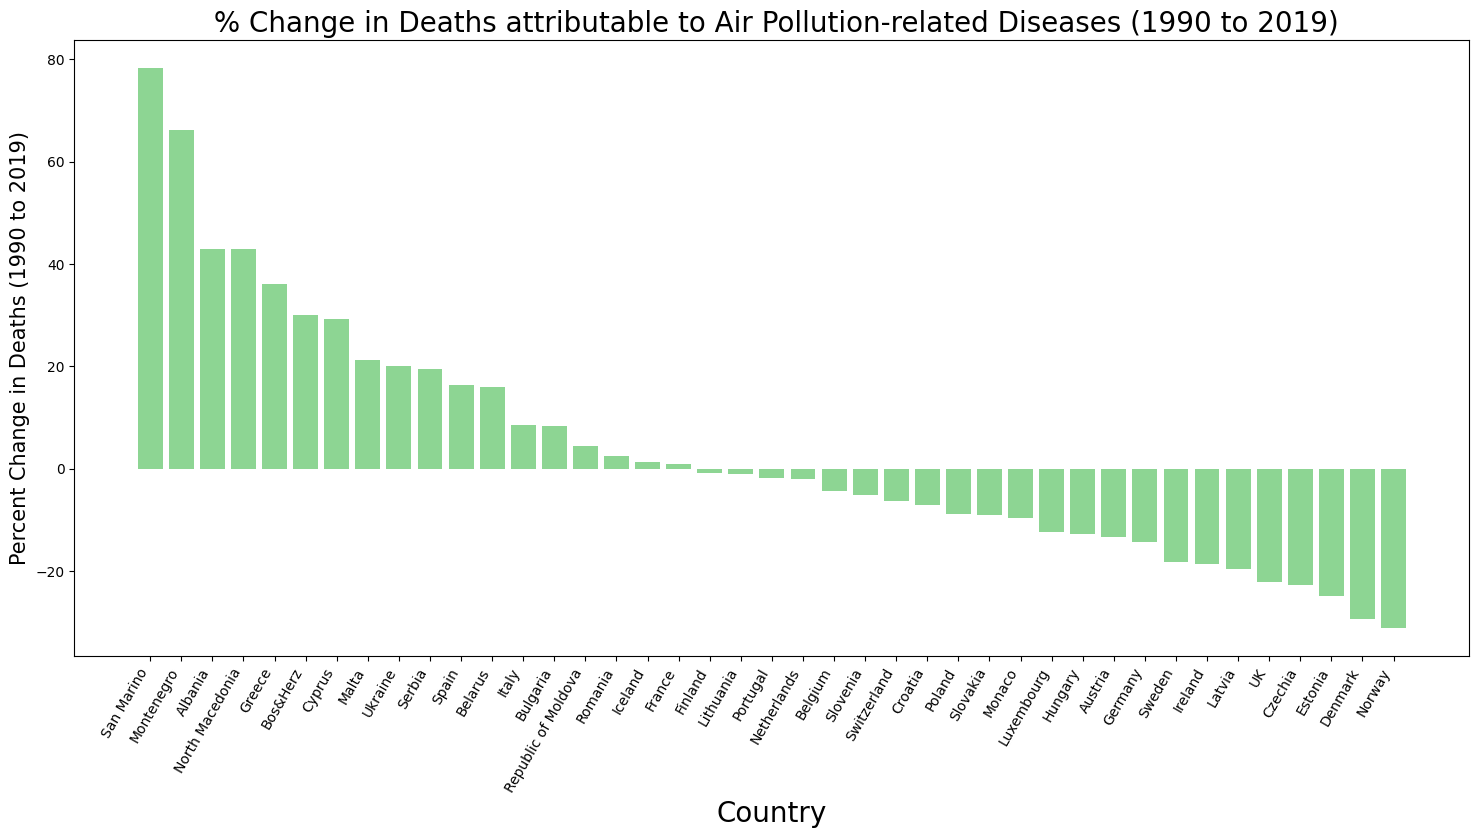

In [29]:
# Filter data for the years 1990 and 2019
selected_years = [1990, 2019]
filtered_df = health_effects_df[health_effects_df['year'].isin(selected_years)]
filtered_df = filtered_df[filtered_df['location'] != 'Andorra']

# Pivot the DataFrame to have years as columns and countries as rows
pivoted_df = filtered_df.pivot_table(index='location',
                                     columns='year', values='val', aggfunc='sum')

# Calculate percent change
pivoted_df['percent_change'] = ((pivoted_df[2019] - pivoted_df[1990]) / pivoted_df[1990]) * 100

# Sort countries based on percent change
sorted_df = pivoted_df.sort_values(by='percent_change',
                                   ascending=False)

# Plot the percent change
plt.figure(figsize=(18, 8))
plt.bar(sorted_df.index, sorted_df['percent_change'], color='#8dd593')
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Percent Change in Deaths (1990 to 2019)' ,fontsize=15)
plt.title(' % Change in Deaths attributable to Air Pollution-related Diseases (1990 to 2019)' , fontsize=20)
plt.xticks(rotation=60, ha='right')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.savefig('death_percent_change_plot.png', facecolor='#F9F9F9', bbox_inches='tight')

plt.show()

In [30]:
pivoted_df.head()


year,1990,2019,percent_change
location,,,
Albania,10032.905622,14347.752188,43.006949
Austria,44522.066122,38592.955291,-13.317241
Belarus,68917.877901,79928.299652,15.976147
Belgium,51233.115015,48979.871844,-4.398021
Bos&Herz,15988.441150,20797.917818,30.080961
